# Simple linear regression

* We will predict employee salaries from different employee characteristics (or features). We are going to use a simple supervised learning technique: linear regression.
* We want to build a simple model to determine how well Years Worked predicts an employee’s salary.

#### importing modules
* pandas
* matplotlib
* statsmodels
* sklearn
* seaborn
* numpy
* math

Reading the data "salary.csv" to a Jupyter Notebook. A description of the variables is given in Salary Metadata. You will need the packages matplotlib, pandas and statsmodels.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import numpy as np
sns.set()
raw_data = pd.read_csv('salary.csv')

### examining data
* Finding missing values
* filling missing value with mean

In [2]:
raw_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [4]:
raw_data.shape

(514, 11)

there is one missing values in the column salary

replacing missing values with mean

In [5]:
raw_data = raw_data.fillna(raw_data[raw_data.yearsworked == 21].salary.mean())


### visualizing
* Heatmap
* Histograms
* scatterplot

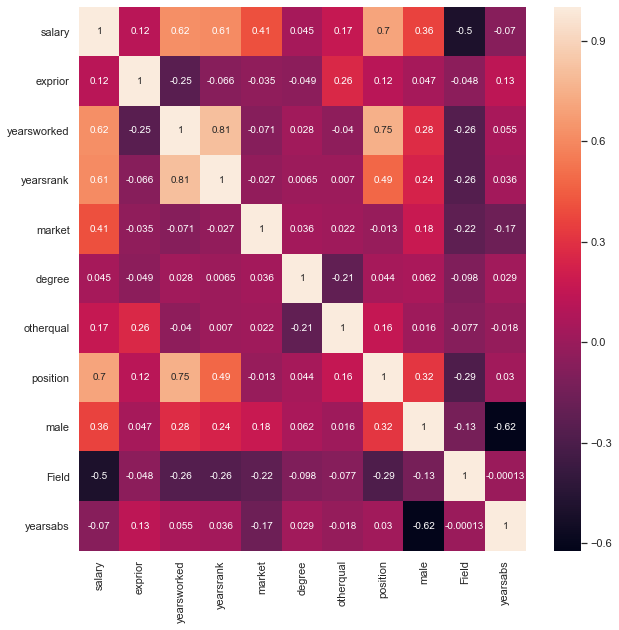

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(raw_data.corr(), annot=True)
plt.show()

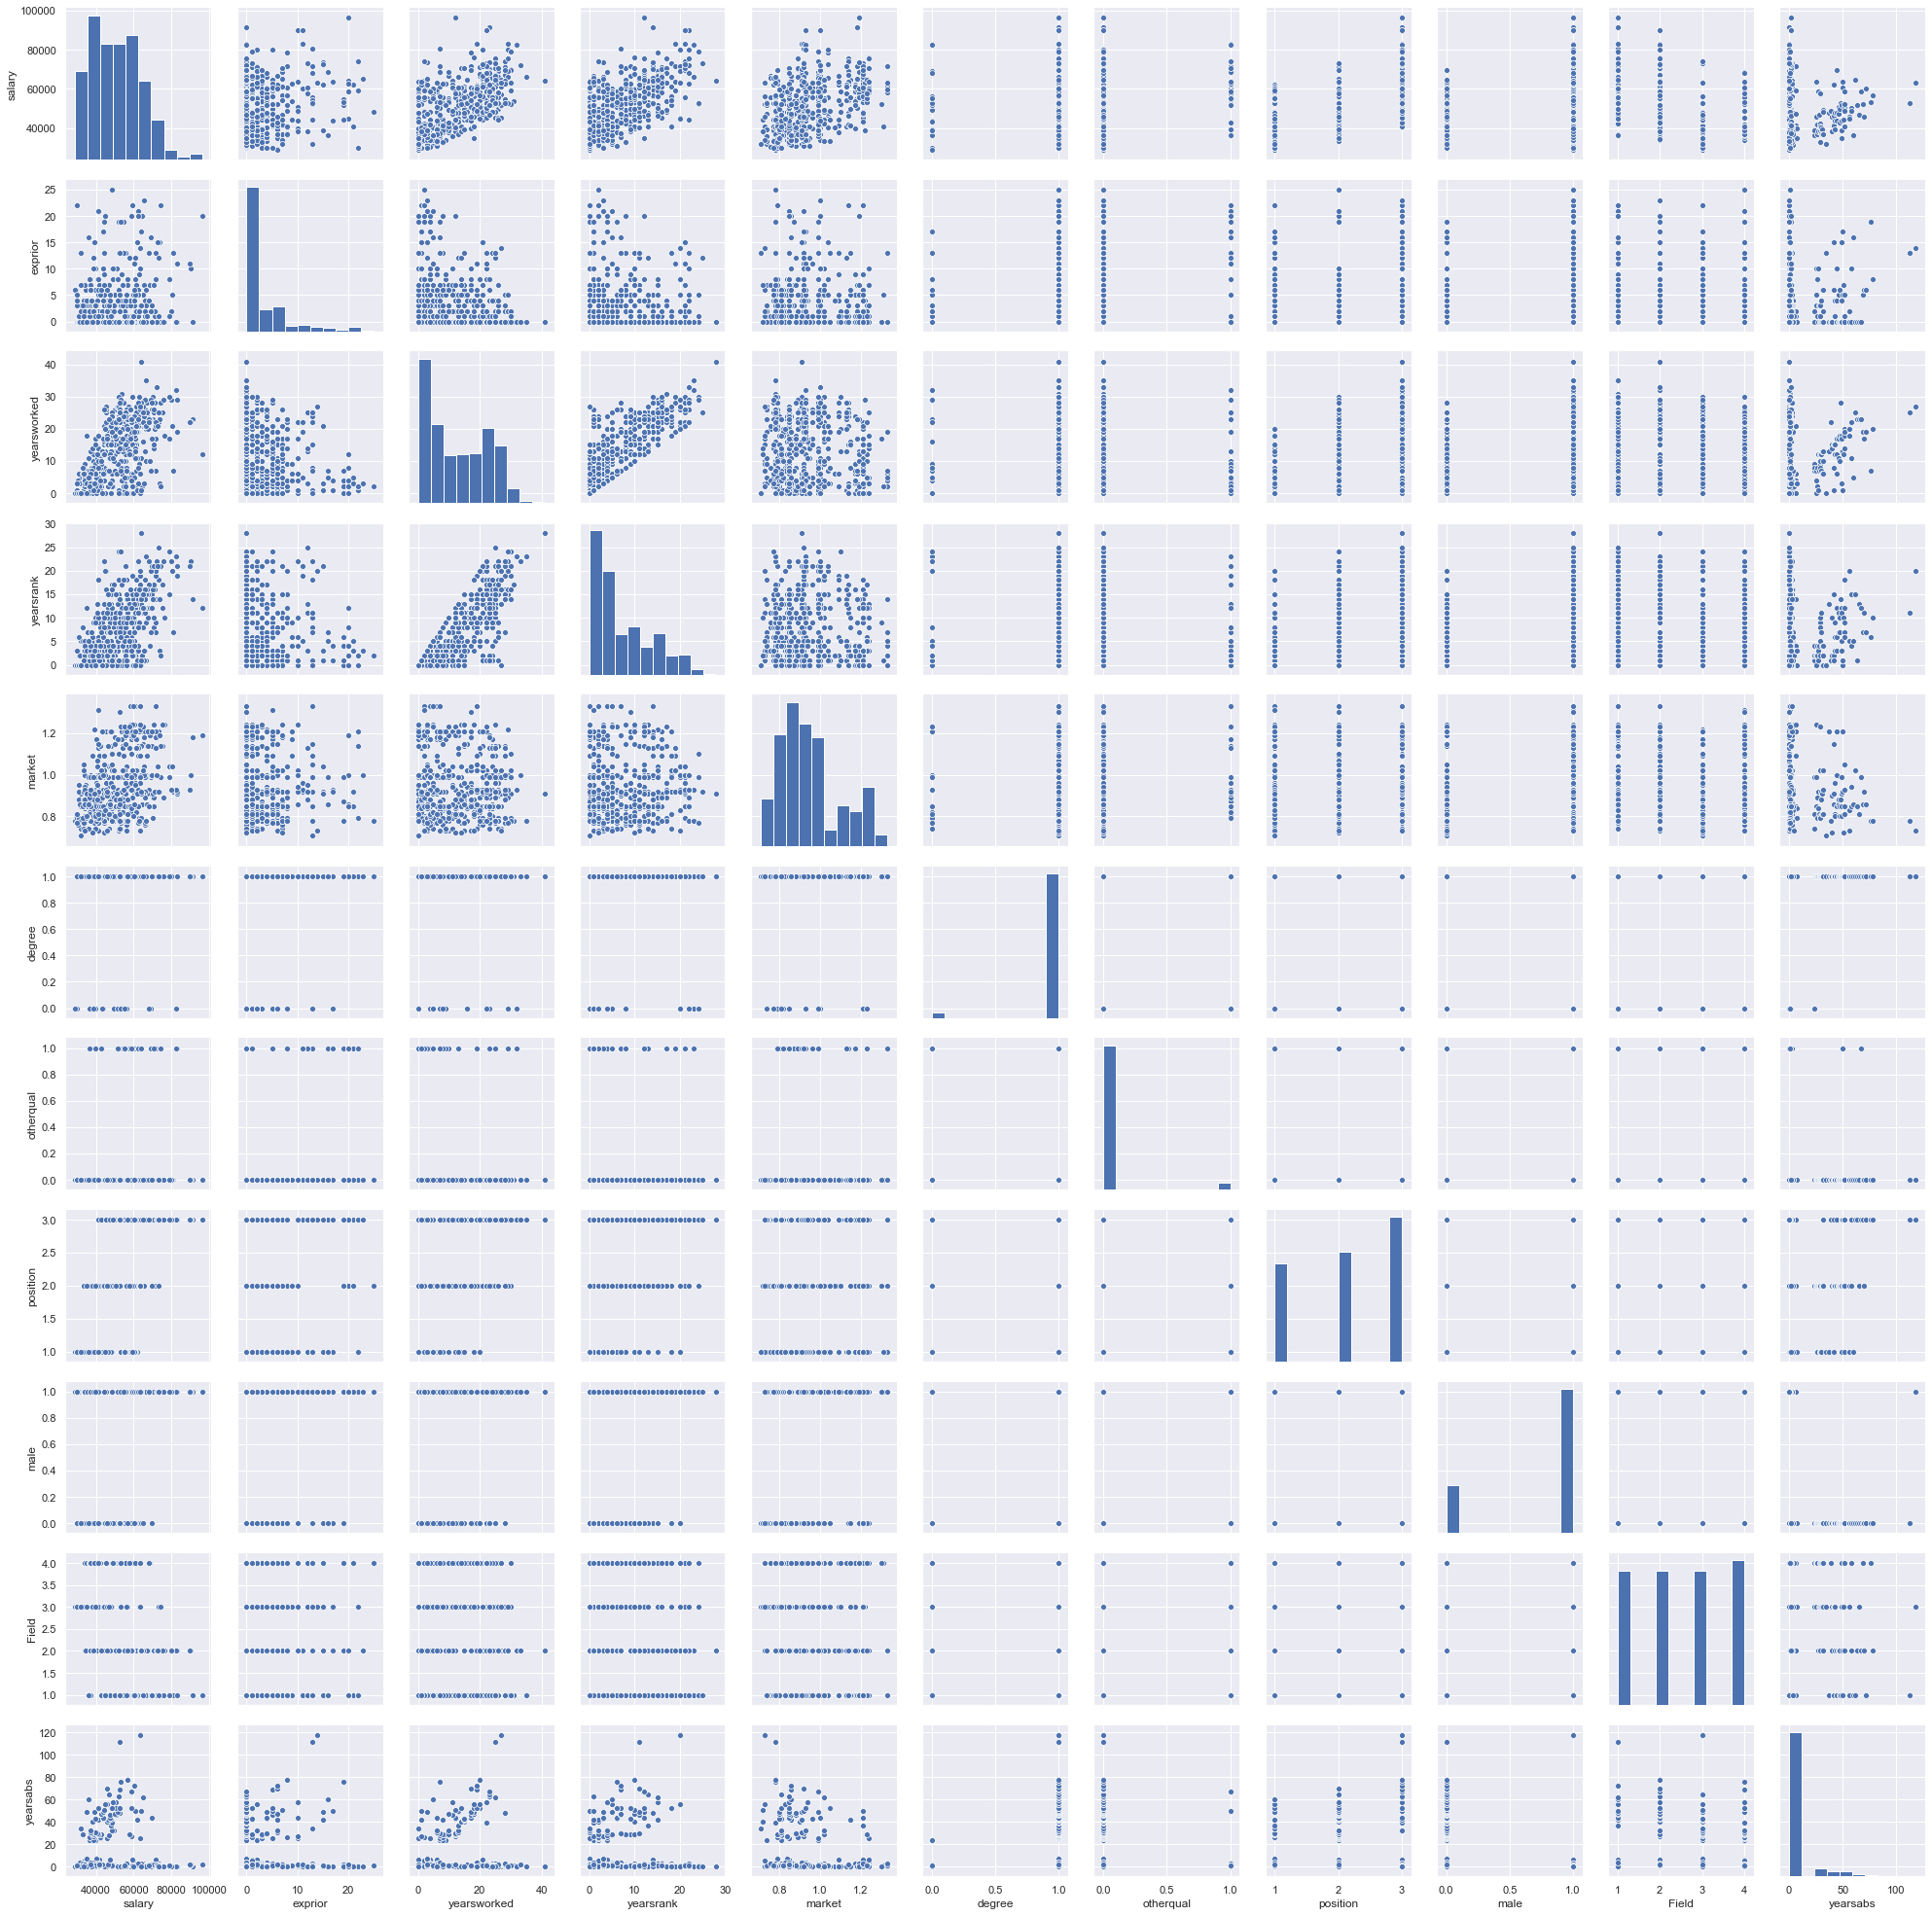

In [7]:
sns.pairplot(raw_data)
plt.show()

the above correlation pairplot shows that the is linear relationship between salary and years worked.

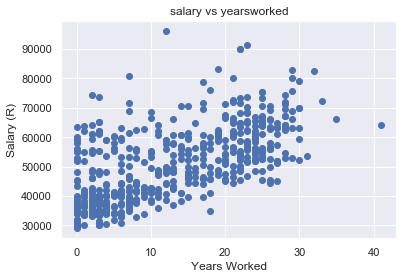

In [8]:
plt.scatter(x='yearsworked', y='salary', data=raw_data)
plt.title('salary vs yearsworked')
plt.xlabel('Years Worked')
plt.ylabel('Salary (R)')
plt.show()

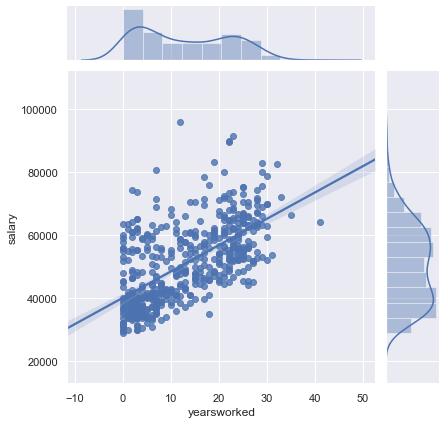

In [9]:
sns.jointplot(x=raw_data['yearsworked'], y=raw_data['salary'], data=raw_data, kind='reg')
plt.show()

In [10]:
# finding outliers for raw_data
first_quart,sec_quart = raw_data.salary.quantile([0.25,0.75])
iqt = sec_quart - first_quart
iqtr = iqt * 1.5
low_value = first_quart - iqtr
high_value = sec_quart + iqtr
print('lower outlier =',low_value,'higher outlier', high_value)


lower outlier = 9540.14224234375 higher outlier 90766.42959609375


### dropping values
* droping salary values greater than 90766.42
* dropping yearsworked values greater than 40

In [23]:
raw_data = raw_data[raw_data.salary < 90766.42]
raw_data = raw_data[raw_data.yearsworked < 40]

### splitting data 
* splitting data
* examining the training data


In [24]:
train_data, test_data = train_test_split(raw_data, test_size=0.3, random_state=24)

### Creating a model to predict salaries using yearworked

In [25]:
from statsmodels.formula.api import ols
model = ols(formula='salary ~ yearsworked', data=train_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     203.3
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           8.72e-37
Time:                        14:36:49   Log-Likelihood:                -3789.2
No. Observations:                 357   AIC:                             7582.
Df Residuals:                     355   BIC:                             7590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.084e+04    895.820     45.594      0.000    3.91e+04    4.26e+04
yearsworked   804.6939     56.437     14.258      0.000     693.701     915.687
==============================================================================
Omnibus:                       35.798   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.779
Skew:                           0.843   Prob(JB):                     3.12e-10
Kurtosis:                       3.314   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

In [26]:
# constant and x_value
print(model.params)

Intercept      40843.813436
yearsworked      804.693887
dtype: float64


In [27]:
dicti = {'yearsworked': [4]}
data = pd.DataFrame(dicti)
pred = model.predict(data)
pred

0    44062.588986
dtype: float64

What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

The model predicts the dependent variable. 38.4% of the variability or differences in salary can be explained by the variabilty of years worked

### the unstandardized coefficient (B or ‘coef’ in statsmodels)

salary = 855.6879*x_train + 39915.342182
The unstandardized coefficient of model tells me that a person with zero years worked earns a salary of R39920

### the 95% confidence intervals [0.025, 0.975] 

it means the model is 95% confident that the mean of salaries is between R38200 and	R41600

### Predicting the salary for 12 years’ work experience.

In [28]:
dicti = {'yearsworked': [12]}
data = pd.DataFrame(dicti)
print('12years worked experience salary',model.predict(data))

12years worked experience salary 0    50500.140084
dtype: float64


### Predicting the salary for 80 years work experience

In [34]:
dic = {'yearsworked': [80]}
dataa = pd.DataFrame(dic)
print('12years work experience salary',model.predict(dataa))

12years work experience salary 0    105219.324422
dtype: float64


In [35]:
train_pred = model.predict(train_data)
train_pred

508    56132.997296
64     46476.670648
241    60961.160620
94     44867.282873
132    44062.588986
215    42453.201211
188    53718.915634
97     45671.976760
453    41648.507324
269    58547.078958
154    45671.976760
418    44062.588986
115    48086.058422
14     40843.813436
433    46476.670648
71     45671.976760
161    52914.221746
23     43257.895098
127    45671.976760
189    56937.691183
131    46476.670648
155    51304.833972
162    51304.833972
238    64179.936169
65     45671.976760
396    42453.201211
114    46476.670648
332    57742.385070
265    59351.772845
47     44867.282873
           ...     
254    59351.772845
387    41648.507324
28     42453.201211
223    52914.221746
163    51304.833972
412    44062.588986
394    42453.201211
376    67398.711718
274    57742.385070
330    42453.201211
231    56937.691183
402    40843.813436
372    64984.630056
486    63375.242282
381    58547.078958
398    40843.813436
339    61765.854507
227    42453.201211
498    52109.527859


the problem about model is that it does not have yearsworked limit, it can predict 80 years work experience

### other employee characteristics might influence their salary

In [32]:
raw_data.corr()['salary']

salary         1.000000
exprior        0.102962
yearsworked    0.632991
yearsrank      0.613985
market         0.397765
degree         0.042915
otherqual      0.174219
position       0.705389
male           0.362254
Field         -0.490952
yearsabs      -0.066191
Name: salary, dtype: float64

#### employee characteristics that might influence their salary
* position
* years rank
* market

#### Now fit your model to your test set. DO NOT BUILD A NEW MODEL ON THE TEST SET! Simply use your existing, model, to predict salaries in the test set.

In [33]:
model.predict(test_data)

371    58547.078958
286    60156.466732
31     43257.895098
333    62570.548394
425    40843.813436
184    54523.609521
359    58547.078958
360    64984.630056
105    49695.446197
3      42453.201211
77     41648.507324
32     40843.813436
70     44062.588986
81     43257.895098
135    44062.588986
25     43257.895098
6      42453.201211
119    45671.976760
502    49695.446197
237    58547.078958
111    48890.752310
317    63375.242282
5      40843.813436
244    52109.527859
315    61765.854507
370    64179.936169
466    51304.833972
116    42453.201211
493    50500.140084
103    45671.976760
           ...     
179    48086.058422
484    48890.752310
456    50500.140084
368    63375.242282
153    48086.058422
219    59351.772845
48     41648.507324
79     40843.813436
165    43257.895098
249    61765.854507
267    60156.466732
305    60156.466732
374    61765.854507
72     45671.976760
471    52914.221746
220    54523.609521
40     43257.895098
201    53718.915634
46     44062.588986


### 8.How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

In [21]:
pred_train = model.predict(train_data)
pred_test = model.predict(test_data)
rmse_train = sqrt(mean_squared_error(train_data.salary, pred_train))
rmse_test = sqrt(mean_squared_error(test_data.salary, pred_test))
print('RMSE Train', rmse_train)
print("RMSE Test", rmse_test)
print("difference between training and test is", rmse_train - rmse_test)

RMSE Train 9848.406119228663
RMSE Test 9053.054256574285
difference between training and test is 795.3518626543773


### Conclusion
this is the best model to predict salary since most of the predicted values are correct and the difference between the train set RMSE and test set RMSE is 795 however the model can predict impossible values 